In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import unyt as u

In [2]:
CB_color_dict = {
    "gromacs":'#377eb8', 
    "lammps-VU": '#ff7f00', 
    "lammps-UD": '#4daf4a', 
    "lammps-vu": '#ff7f00', 
    "lammps-ud": '#4daf4a',  
    "hoomd": '#f781bf', 
    "gomc": '#a65628', 
    "cassandra": '#984ea3',
    "mcccs": '#999999',
}

plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 18

/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/935696885.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


0.3759717385014754
methaneUA


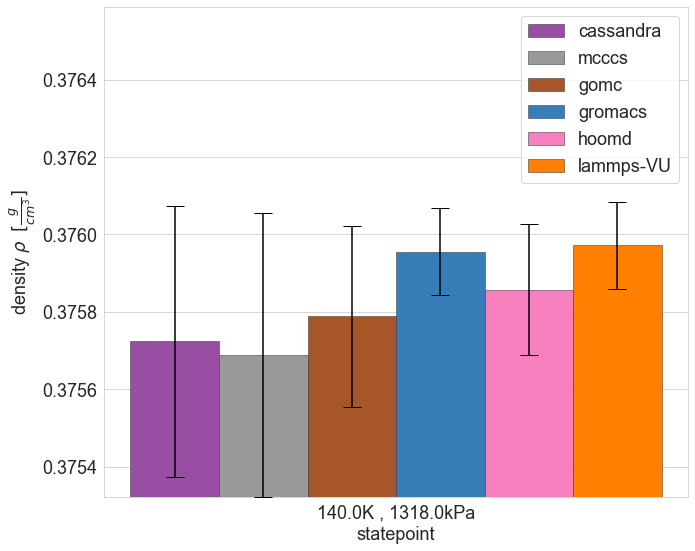

skipping: pentaneUA-flexible_bonds, plotting separately later.
skipping: pentaneUA-constrain_bonds, plotting separately later.


/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/935696885.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


waterSPCE


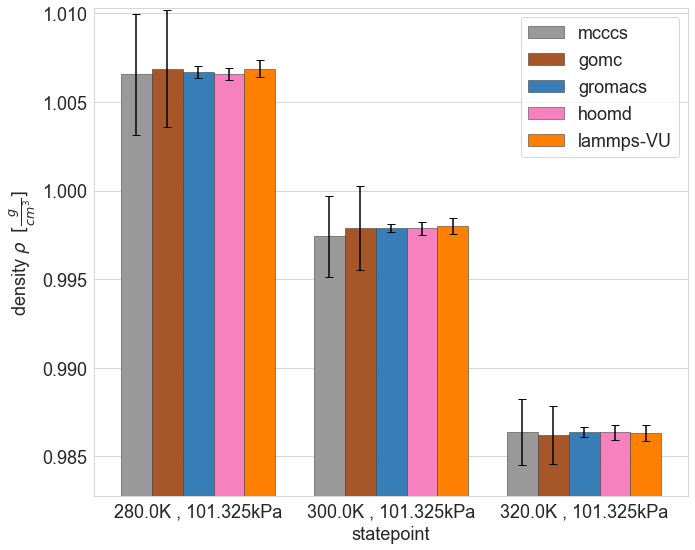

/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/935696885.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


ethanolAA


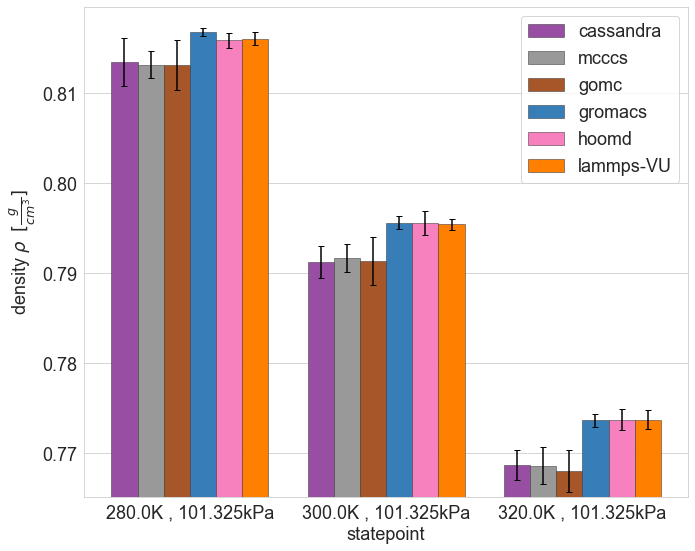

/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/935696885.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


benzeneUA


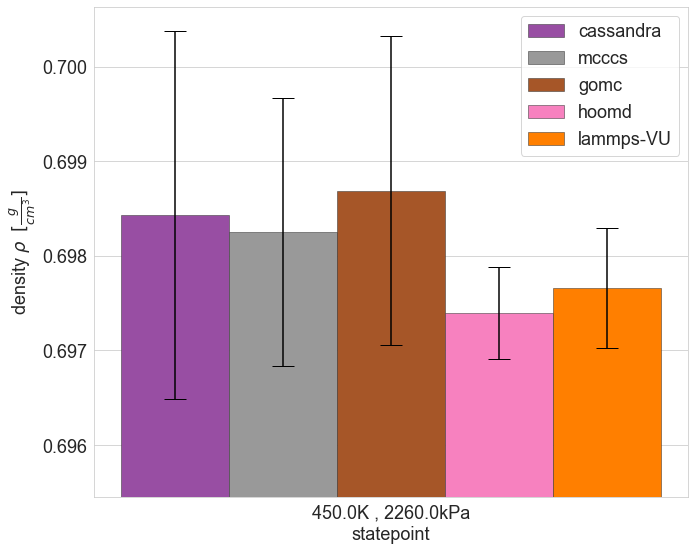

In [3]:
"""Generate summary files for the aggregate project."""
sns.set_style("whitegrid")
summary_df = pd.read_csv("aggregate_summary_all.csv")
molecules = summary_df["molecule"]
molecule_set = set(molecules)
group_key = "molecule"
g_list = []
for molecule in molecule_set:
    if molecule.startswith("pentane"):
        print(f"skipping: {molecule}, plotting separately later.")
        continue
    try:
        mol_group = summary_df.groupby(group_key)
        mol_df = mol_group.get_group(molecule)
    except KeyError:
        print(f"skipping: {molecule}, no data available.")
        continue
    mol_df["statepoint"] = (
        summary_df["temperature"].map(str)
        + "K , "
        + summary_df["pressure"].map(str)
        + "kPa"
    )
    sp_set = set(mol_df["statepoint"])
    for engine in mol_df["engine"].unique():
        found_sp = mol_df[mol_df["engine"] == engine].index.tolist()
        #print(found_sp)
        if len(found_sp) == len(set(mol_df["statepoint"])):
            #print(engine, "good!")
            pass
        else:
            print(engine, "bad")
            mol_df.drop(axis=0, labels=found_sp, inplace=True)

    #display(mol_df)
    plt.clf()
    ax = sns.barplot(
        x="statepoint",
        y="density-avg",
        data=mol_df,
        linewidth=0.5,
        hue="engine",
        palette=CB_color_dict,
        errcolor=".2",
        edgecolor=".2",
        ci="none",
        saturation=1,
    )
    x_list = []
    for patch in ax.patches:
        x_list.append(patch.get_xy()[0] + (patch._width / 2))
    val_min = mol_df["density-avg"].min()
    val_max = mol_df["density-avg"].max()
    val_std_max = mol_df["density-std"].max()
    val_std_min = mol_df["density-std"].min()
    #print(val_min, val_max)
    #print(x_list)
    if molecule == "methaneUA":
        print(val_max)
        val_max += 0.00025
    ax.set(ylim=(val_min - 2*val_std_max, val_max+2*val_std_max))
    ax.set(ylabel=r"density $\rho$  $[\frac{g}{cm^3}]$", xlabel="statepoint")
    
    l,r = plt.xlim()
    width = patch._width/(r-l) * 70
    plt.errorbar(
        x_list,
        mol_df["density-avg"],
        yerr=2 * mol_df["density-std"],
        marker="None",
        mec="black",
        zorder=30,
        elinewidth=1.5,
        capsize=width,
        ecolor="black",
        linestyle="None",
        markersize=1,
    )
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(f"{molecule}_summary.png", dpi=300)
    print(f"{molecule}")
    plt.show()

/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/1666979604.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df_flex["statepoint"] = "flexible bonds"
/var/folders/yz/120rjvsj7kq8hjz0cppdsx7r0000gr/T/ipykernel_4662/1666979604.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df_constrain["statepoint"] = "constrained bonds"


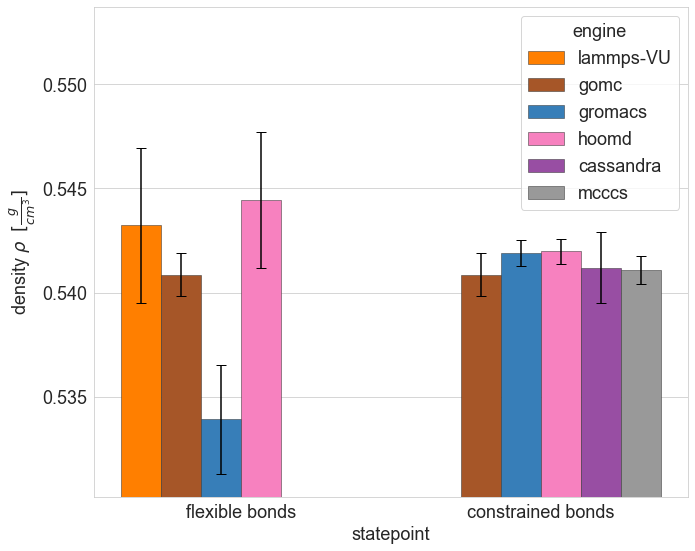

In [4]:
"""Generate summary files for the aggregate project."""
sns.set_style("whitegrid")
summary_df = pd.read_csv("aggregate_summary_all.csv")
molecules = summary_df["molecule"]
molecule_set = set(molecules)
group_key = "molecule"
g_list = []

try:
    mol_group = summary_df.groupby(group_key)
    mol_df_constrain = mol_group.get_group('pentaneUA-constrain_bonds')
    mol_df_flex = mol_group.get_group('pentaneUA-flexible_bonds')
except KeyError:
    print(f"skipping: {molecule}, no data available.")
mol_df_flex["statepoint"] = "flexible bonds"
mol_df_constrain["statepoint"] = "constrained bonds"
mol_df = pd.concat([mol_df_flex,mol_df_constrain], axis=0)

df = mol_df.copy()
df.sort_values(by=["statepoint", "engine"], ascending=[False,True], inplace=True)
move_idx_end = []
move_idx_front = []
for engine, rows in df.groupby("engine"):
    if len(rows) != 2:
        if (rows["statepoint"] == "constrained bonds").all():
            move_idx_end += [rows.index[0]]
        else:
            move_idx_front += [rows.index[0]]
        
new_idx = move_idx_front + df.index.drop(move_idx_end + move_idx_front).tolist() + move_idx_end
df = df.reindex(new_idx)
df.reset_index(drop=True, inplace=True)

ax = sns.barplot(
    x="statepoint",
    y="density-avg",
    data=df,
    linewidth=0.5,
    hue="engine",
    palette=CB_color_dict,
    errcolor=".2",
    edgecolor=".2",
    ci="none",
    saturation=1
)
x_list = [p.get_xy()[0] + (p._width / 2) for p in ax.patches if not np.isnan(p.get_height())]
x_list.sort()
val_min = df["density-avg"].min()
val_max = df["density-avg"].max()
val_std_max = df["density-std"].max()
val_std_min = df["density-std"].min()
#print(val_min, val_max)
#print(x_list)
ax.set(ylim=(val_min - 2*val_std_max, val_max+5*val_std_max))
ax.set(ylabel=r"density $\rho$  $[\frac{g}{cm^3}]$", xlabel="statepoint")

patch = ax.patches[0]
l,r = plt.xlim()
width = patch._width/(r-l) * 70
plt.errorbar(
    x_list,
    df["density-avg"],
    yerr=2 * df["density-std"],
    marker="None",
    mec="black",
    zorder=30,
    elinewidth=1.5,
    capsize=width,
    ecolor="black",
    linestyle="None",
    markersize=1,
)
plt.tight_layout()
plt.savefig("pentane_summary.png", dpi=300)
plt.show()

# LRC analysis

data taken from google drive 4/18/2022 -- with the exception of HOOMD LRC which is taken from main project... I don't know what is going on with lrc sub project but it appears to be way off??

In [5]:
labels = ["gromacs", "lammps-VU", "hoomd", "gomc", "cassandra", "mcccs"]
hard_dens_avg = np.array([0.3632,0.36319,0.36307,0.36966,0.36966,0.36969])
hard_dens_std = np.array([0.0001,0.00013,0.00011,0.00013,0.00018,0.00004])

lrc_dens_avg = np.array([0.3760, 0.37594, 0.375858, 0.37579, 0.37574, 0.37575])
lrc_dens_std = np.array([0.0001, 0.00005, 0.000085, 0.00012, 0.00014, 0.00005])

shift_dens_avg = np.array([0.3632, 0.36318, 0.36305, 0.36310, 0.36313, 0.36309])
shift_dens_std = np.array([0.0001, 0.00018, 0.00010, 0.00019, 0.00019, 0.00003])

In [6]:
CB_color_dict = {
    "gromacs":'#377eb8', 
    "lammps-VU": '#ff7f00', 
    "lammps-UD": '#4daf4a',  
    "hoomd": '#f781bf', 
    "gomc": '#a65628', 
    "cassandra": '#984ea3',
    "mcccs": '#999999',
}

color_cycle = [CB_color_dict[i] for i in labels]

In [7]:
def plot_avg_std(avg, std, name):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots()
    ax.bar(
        labels,
        avg,
        color=color_cycle,
        width=1,
        edgecolor="black",
        linewidth=0.5,
    )
    patch = ax.patches[0]
    l,r = plt.xlim()
    width = patch._width/(r-l) * 70
    
    ax.errorbar(
        labels,
        avg,
        yerr=2*std,
        color="black",
        capsize=width,
        fmt=","
    )
    ax.grid(axis="x")
    ax.set(ylabel=r"density $\rho$  $[\frac{g}{cm^3}]$", xlabel="engine")
    spread = 0.0005
    ax.set_ylim((min(avg)-spread, max(avg)+spread))
    plt.tight_layout()
    plt.savefig(name, dpi=300)
    plt.show()


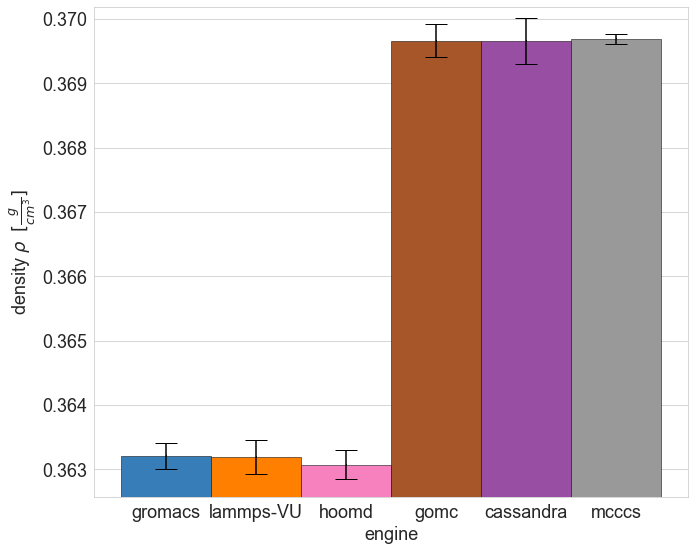

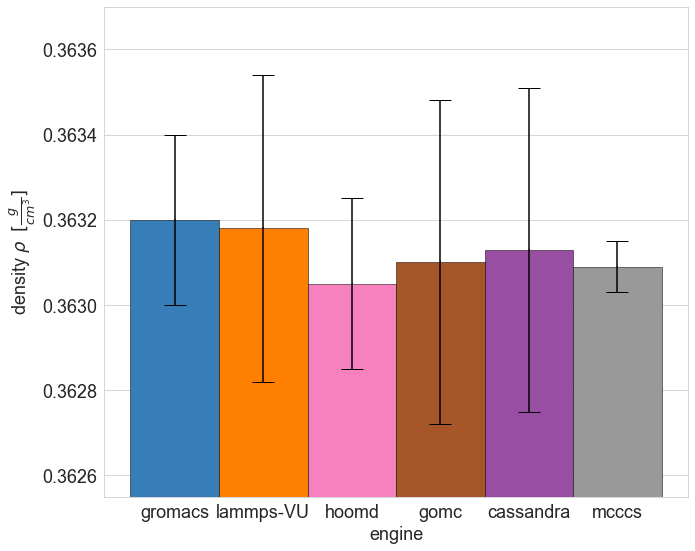

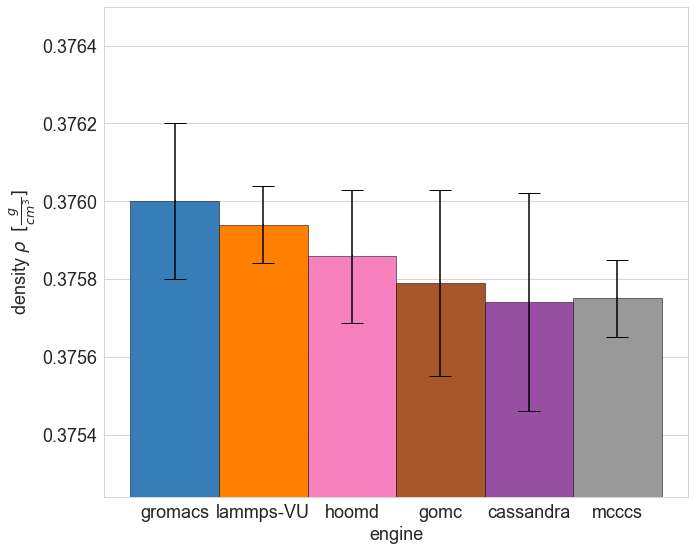

In [8]:
plot_avg_std(hard_dens_avg, hard_dens_std, "hard_cutoff.png")
plot_avg_std(shift_dens_avg, shift_dens_std, "shift_cutoff.png")
plot_avg_std(lrc_dens_avg, lrc_dens_std, "lrc_cutoff.png")